# Spam mail Detection USing Machine Learning and DeepLearning

In [1]:
# email spam classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string # contain all rhe characters and symbols which we are using daily
import nltk #this natural alnguage processing toolkit
from nltk.corpus import stopwords
#This line imports the stopwords corpus from nltk.
#Stop words are words that you want to ignore,
#so you filter these out when you’re processing text.
#When you’re working with text mining or natural language processing,
#stop words can add a lot of noise, so they’re removed
from wordcloud import WordCloud # class from the wordcloud is visual representation of text data.it displays lsit of words the importance of each being shownwith fontsize and colour
nltk.download('stopwords')
'''
This is necessary if the stopwords corpus hasn’t been downloaded yet.
The stopwords corpus is a list of stop words that are used in nltk for natural language processing.
'''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'\nThis is necessary if the stopwords corpus hasn’t been downloaded yet.\nThe stopwords corpus is a list of stop words that are used in nltk for natural language processing.\n'

In [3]:
# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("spam.csv")
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
data.shape

(5572, 2)

In [6]:
data.describe

<bound method NDFrame.describe of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

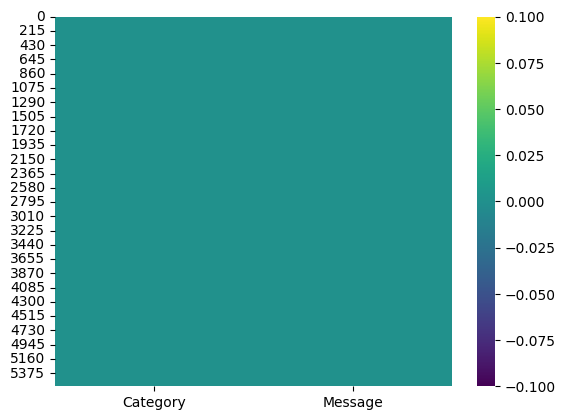

In [7]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=True)
plt.show()

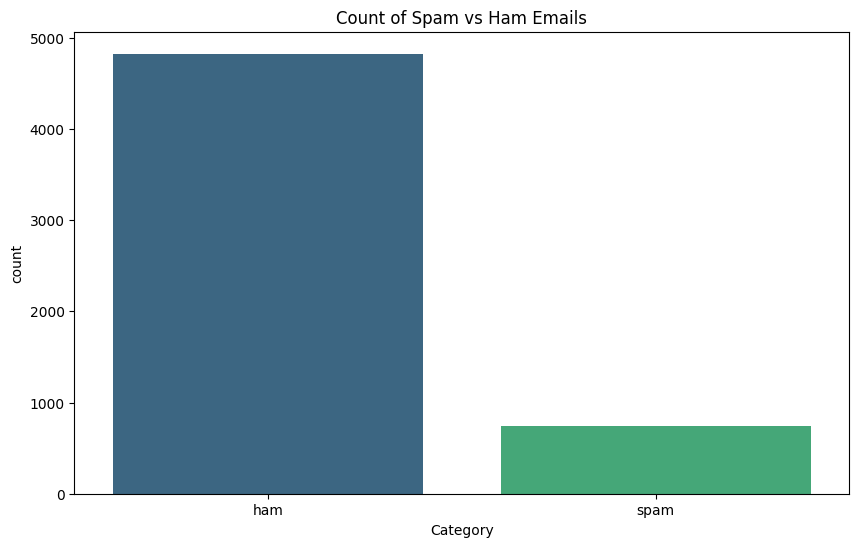

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Category' is the column with spam/ham labels
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=data, palette='viridis')
plt.title('Count of Spam vs Ham Emails')
plt.show()


spam    747
ham     747
Name: Category, dtype: int64


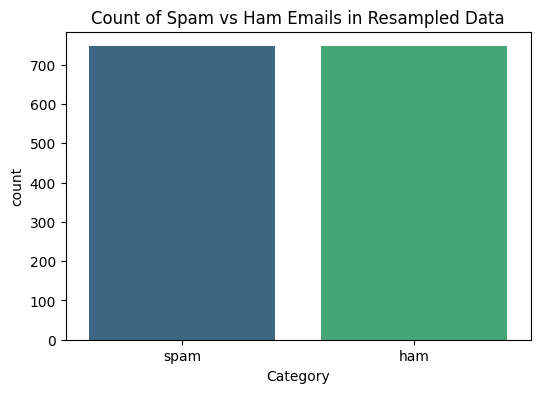

In [9]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'data' is your DataFrame and 'Category' is the column with spam/ham labels
spam = data[data['Category'] == 'spam']
ham = data[data['Category'] == 'ham']

# Downsample majority class (ham) or Upsample minority class (spam)
if len(spam) > len(ham):
    spam_downsampled = resample(spam, replace=False, n_samples=len(ham), random_state=47)
    data_resampled = pd.concat([spam_downsampled, ham])
else:
    ham_downsampled = resample(ham, replace=True, n_samples=len(spam), random_state=47)
    data_resampled = pd.concat([spam, ham_downsampled])

# Now you have a balanced dataset
print(data_resampled['Category'].value_counts())

# Plotting the result
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=data_resampled, palette='viridis')
plt.title('Count of Spam vs Ham Emails in Resampled Data')
plt.show()


In [10]:
data_resampled.tail(10)

,Category,Message
2617,ham,I went to ur hon lab but no one is there.
3053,ham,Please leave this topic..sorry for telling that..
30,ham,"Wait that's still not all that clear, were you..."
2659,ham,Not yet chikku..wat abt u?
4268,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
3669,ham,Thanks for loving me so. You rock
3690,ham,You still coming tonight?
3649,ham,As per your request 'Maangalyam (Alaipayuthe)'...
3681,ham,I cant pick the phone right now. Pls send a me...
1459,ham,"Fighting with the world is easy, u either win ..."


In [11]:
#check duplicates in message
data_resampled.duplicated(subset='Message').sum()

178

In [12]:
#drop duplicates keep first
data_resampled.drop_duplicates(keep='first', inplace=True)

In [13]:
data_resampled['Message'] = data_resampled['Message'].str.replace('Subject', '')
data_resampled.tail()


,Category,Message
30,ham,"Wait that's still not all that clear, were you..."
2659,ham,Not yet chikku..wat abt u?
3669,ham,Thanks for loving me so. You rock
3690,ham,You still coming tonight?
3649,ham,As per your request 'Maangalyam (Alaipayuthe)'...


In [14]:
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

data_resampled['Message']= data_resampled['Message'].apply(lambda x: remove_punctuations(x))
data_resampled.head()
#data_resampled.tail(3)



,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling its been 3 weeks now...
8,spam,WINNER As a valued network customer you have b...
9,spam,Had your mobile 11 months or more U R entitled...
11,spam,SIX chances to win CASH From 100 to 20000 poun...


In [15]:
#The below function is a helper function that will help us to remove the stop words.
def remove_stopwords(Message):
	stop_words = stopwords.words('english')#collecting the genral english words(like a,above,the an,after,etc)

	imp_words = []# input array to collect the words that are not stop words

	# Storing the important words
	for word in str(Message).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


data_resampled['Message'] = data_resampled['Message'].apply(lambda Message: remove_stopwords(Message))
data_resampled.head()


,Category,Message
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
5,spam,freemsg hey darling 3 weeks word back id like ...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months u r entitled update latest co...
11,spam,six chances win cash 100 20000 pounds txt csh1...


In [16]:
data_resampled.tail(10)

,Category,Message
158,ham,hello love get interview today happy good boy ...
1292,ham,hey babe saw came online second disappeared ha...
2553,ham,oh fine ill tonight
2617,ham,went ur hon lab one
3053,ham,please leave topicsorry telling
30,ham,wait thats still clear sure sarcastic thats x ...
2659,ham,yet chikkuwat abt u
3669,ham,thanks loving rock
3690,ham,still coming tonight
3649,ham,per request maangalyam alaipayuthe set callert...


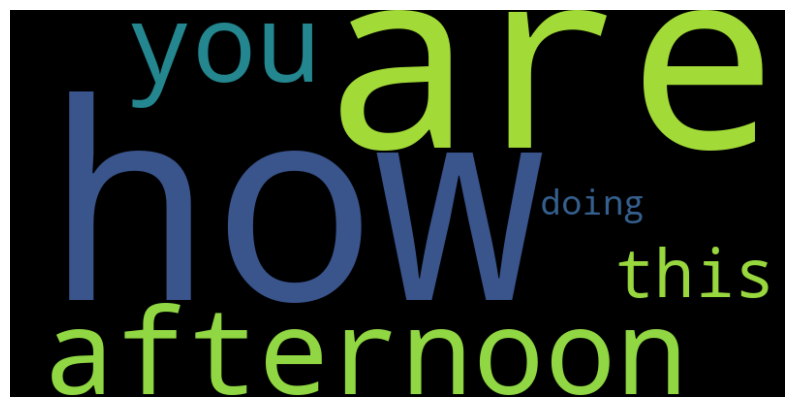

In [17]:
# word cloud working processes
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dictionary of word frequencies
word_freq = {'how': 100, 'are': 100, 'you': 80, 'doing': 1, 'this': 20, 'afternoon': 100}

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200)

# Generate a word cloud from word frequencies
wordcloud.generate_from_frequencies(word_freq)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


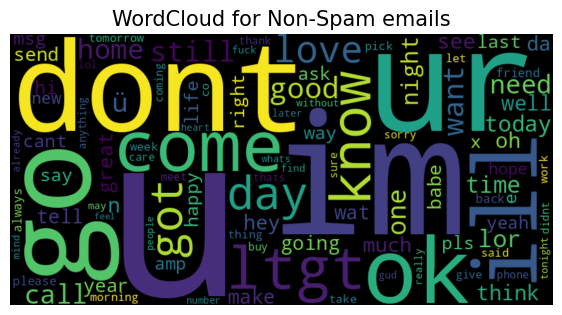

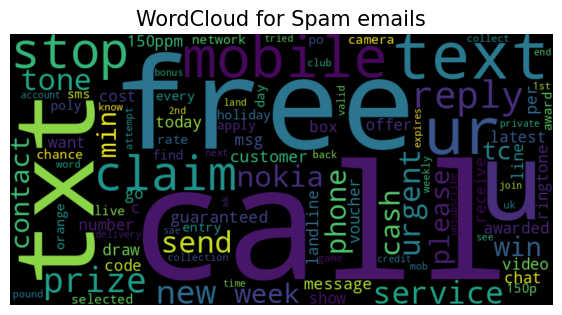

In [18]:
# defining most frequent words in spam
#using the word cloud from tenser flow we are taking the mot frequent words foom the ham and spam messages
def plot_word_cloud(data, typ):
	email_corpus = " ".join(data['Message'])

	plt.figure(figsize=(7, 7))

	wc = WordCloud(background_color='black',
				max_words=100,
				width=800,
				height=400,
				collocations=False).generate(email_corpus)

	plt.imshow(wc, interpolation='bilinear')
	plt.title(f'WordCloud for {typ} emails', fontsize=15)
	plt.axis('off')
	plt.show()

plot_word_cloud(data_resampled[data_resampled['Category'] == 'ham'], typ='Non-Spam')
plot_word_cloud(data_resampled[data_resampled['Category'] == 'spam'], typ='Spam')


In [21]:
# Convert 'ham' and 'spam' into 0 and 1
data_resampled['Category'] = data_resampled['Category'].map({'ham': 0, 'spam': 1})

In [22]:
# splitting the data into test and train datasets
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(data_resampled['Message'],
 data_resampled['Category'],
test_size = 0.2,
 random_state = 42)

In [23]:
#spliting the text into simple simple words
import nltk
nltk.download('punkt')# used for the dividing the text into words which i used to read the and manipulate while dealing with

from nltk.tokenize import sent_tokenize, word_tokenize

text = "Natural language processing (NLP) is a field of computer science, artificial intelligence, andcomputational linguistics concerned with the interactions between computers and human (natural) languages."

print(sent_tokenize(text))
print(word_tokenize(text))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Natural language processing (NLP) is a field of computer science, artificial intelligence, andcomputational linguistics concerned with the interactions between computers and human (natural) languages.']
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'artificial', 'intelligence', ',', 'andcomputational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', '.']


In [24]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)# method goes  through all the text and counts the frequency of each wrod

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)#The texts_to_sequences method transforms each text in the list of texts to a sequence of integers2.
test_sequences = tokenizer.texts_to_sequences(test_X)




In [25]:
# Pad sequences to have the same length
max_len = 100 # maximum sequence length
train_sequences = pad_sequences(train_sequences,
								maxlen=max_len,
								padding='post',
								truncating='post')
test_sequences = pad_sequences(test_sequences,
							maxlen=max_len,
							padding='post',
							truncating='post')

In [26]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
									output_dim=32,
									input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))# activitation function is Rectified Linear Unit (f{x}=max(0,x))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))# activitation function used is sigmoid

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           131008    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 134721 (526.25 KB)
Trainable params: 134721 (526.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
'''optimizer – This is the method that helps to optimize the cost function by using gradient descent.
loss – The loss function by which we monitor whether the model is improving with training or not.
metrics – This helps to evaluate the model by predicting the training and the validation data.
'''
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
			metrics = ['accuracy'],
			optimizer = 'adam')


In [35]:
'''Callbacks are used to check whether the model is improving with each epoch or not.
If not then what are the necessary steps to be taken like ReduceLROnPlateau decreases the learning rate further?
Even then if model performance is not improving then training will be stopped by EarlyStopping.
We can also define some custom callbacks to stop training in between if the desired results have been obtained early.
'''

es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [36]:
#now  Train the model to understand the email classification
history = model.fit(train_sequences, train_Y,
					validation_data=(test_sequences, test_Y),
					epochs=20, # we use 20 epochs to so the it will iterate 20 time
					batch_size=32,
					callbacks = [lr, es]
				)


Epoch 1/20
33/33 [==============================] - 1s 38ms/step - loss: 0.6928 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.5038 - lr: 5.2500e-05
Epoch 2/20
33/33 [==============================] - 1s 35ms/step - loss: 0.6928 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.5038 - lr: 5.2500e-05
Epoch 3/20
33/33 [==============================] - 2s 47ms/step - loss: 0.6928 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.5038 - lr: 5.2500e-05
Epoch 4/20
33/33 [==============================] - 2s 50ms/step - loss: 0.6927 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.5038 - lr: 2.6250e-05


In [37]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)


9/9 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5038
Test Loss : 0.6931918859481812
Test Accuracy : 0.5037878751754761


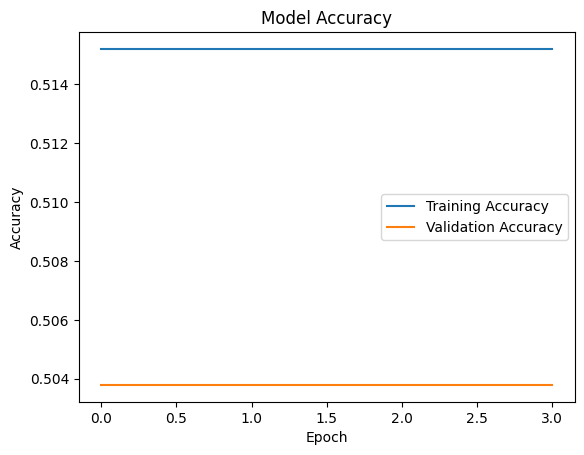

In [38]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
